**OBLIGATORIO FINAL G445 - GRUPO 8**
<br>**INTEGRANTES:**
<br>
<br>*Theo Pereira, 5703834-3, theopereira2001@gmail.com*
<br>*Carlos Píriz, 4298784-4, piriz.carlos@gmail.com*
<br>*Gabriel	Better,3138871-2, gabrielbetter@gmail.com*


In [5]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

# Visualizacion 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**PARTE 1 OBTENCION DE DATOS Y ACERCAMIENTO**

*Carga de datos*

In [6]:
# Carga del archivo superstore a dataframe
# Selecciono la columna Row ID, como indice ya que pareciera ser el identificador de fila, independiente de los datos

# superstore = pd.read_csv("Superstore - Superstore.csv")
# superstore.head()

# miPath = os.path.abspath("")
# superstore = pd.read_csv(miPath+"/Superstore.csv")
# superstore.head()

#superstore_url = 'https://raw.githubusercontent.com/bolso1899/TrabajoFinalCPE/main/Superstore%20-%20Superstore.csv'
superstore_url = 'https://raw.githubusercontent.com/carlos1680/obligatorioCPE/main/ObligatorioFinal/Superstore.csv'
superstore = pd.read_csv(superstore_url)
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


*Verificación inicial*

In [7]:
# Verificacion rapida de valores numericos
superstore.describe()

,Row ID,Postal Code,Sales
count,9801.000000,9787.000000,9.801000e+03
mean,4900.999898,55273.502299,1.033240e+05
std,2829.449151,32040.474490,5.219441e+05
min,1.000000,1040.000000,-3.286850e+05
25%,2451.000000,23223.000000,5.220000e+01
50%,4901.000000,58103.000000,5.894100e+02
75%,7351.000000,90008.000000,4.534400e+04
max,9800.000000,99301.000000,2.396266e+07


In [8]:
# Revision de las columnas
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
# Tipos de datos de las columnas
superstore.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [10]:
# Cantidad filas, nulos columnas y tipos de datos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [11]:
# Cantidad de filas y columnas
superstore.shape

(9801, 18)

In [12]:
# Verificacion de dimensiones
superstore.ndim

2

**Acercamiento a los datos**

*Tratamos de indexar por 'Row ID', evaluando la columna*

In [13]:
# Tipo, cantidad y nulos general
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9801 non-null   int64  
 1   Order ID       9801 non-null   object 
 2   Order Date     9801 non-null   object 
 3   Ship Date      9801 non-null   object 
 4   Ship Mode      9801 non-null   object 
 5   Customer ID    9801 non-null   object 
 6   Customer Name  9801 non-null   object 
 7   Segment        9801 non-null   object 
 8   Country        9798 non-null   object 
 9   City           9801 non-null   object 
 10  State          9801 non-null   object 
 11  Postal Code    9787 non-null   float64
 12  Region         9801 non-null   object 
 13  Product ID     9801 non-null   object 
 14  Category       9801 non-null   object 
 15  Sub-Category   9801 non-null   object 
 16  Product Name   9801 non-null   object 
 17  Sales          9801 non-null   float64
dtypes: float

In [14]:
#Verificamos repetidos para esa columna.
superstore["Row ID"].duplicated(keep= 'first').value_counts()

Row ID
False    9800
True        1
Name: count, dtype: int64

In [15]:
# Consultamos las filas que tienen Row ID duplicados, los registros que quedan marcados como duplicados.
superstore.loc[superstore["Row ID"].duplicated(keep='first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


In [16]:
# Para el Row ID duplicado encontrado, verificamos cuantas filas existen.
superstore.loc[superstore['Row ID']==9800]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


In [17]:
# Vemos que el que esta duplicado por Row ID, tambien esta duplicado en sus valores segun fila
superstore.loc[superstore.duplicated(keep = 'first')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9800,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10384.0


*Eliminacion de fila duplicada*

In [18]:
# Vemos que aparte de repetir el valor  de Row ID, se repiten los valores para toda la fila, estaria duplicada, entonces borramos la fila
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= False)
superstore.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9797 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9786 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float64(2)

*Indexación*

In [19]:
# Ahora que tiene valores distintos y sabemos que no tiene nulos, indexamos por Row ID
superstore.set_index('Row ID',drop = True, inplace = True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [20]:
# Visualizacion de mustra
superstore.sample(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1906,CA-2018-154410,21/10/2018,24/10/2018,First Class,MD-17860,Michael Dominguez,Corporate,United States,Indianapolis,Indiana,46203.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,909.12
9445,CA-2016-104052,01/03/2016,02/03/2016,First Class,TP-21565,Tracy Poddar,Corporate,United States,Coppell,Texas,75019.0,Central,TEC-PH-10003215,Technology,Phones,Jackery Bar Premium Fast-charging Portable Cha...,95.84
5774,CA-2017-117408,31/08/2017,06/09/2017,Standard Class,TP-21130,Theone Pippenger,Consumer,United States,Waco,Texas,76706.0,Central,OFF-ST-10001580,Office Supplies,Storage,Super Decoflex Portable Personal File,23968.00
4278,US-2017-107440,16/04/2017,20/04/2017,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,8701.0,East,TEC-MA-10001047,Technology,Machines,3D Systems Cube Printer. 2nd Generation. Magenta,9099.93
7719,US-2018-146213,09/09/2018,14/09/2018,Standard Class,MC-17605,Matt Connell,Corporate,United States,Los Angeles,California,90032.0,West,TEC-AC-10001114,Technology,Accessories,Microsoft Wireless Mobile Mouse 4000,159.96
3959,CA-2017-156573,29/05/2017,02/06/2017,Standard Class,RB-19360,Raymond Buch,Consumer,United States,Nashville,Tennessee,37211.0,South,OFF-AR-10003732,Office Supplies,Art,Newell 333,4448.00
6785,CA-2018-121293,25/07/2018,28/07/2018,Second Class,JC-15775,John Castell,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,FUR-TA-10001771,Furniture,Tables,Bush Cubix Conference Tables. Fully Assembled,138588.00
5677,CA-2015-135993,28/05/2015,02/06/2015,Standard Class,PJ-18835,Patrick Jones,Corporate,United States,Seattle,Washington,98115.0,West,TEC-AC-10004877,Technology,Accessories,Imation 30456 USB Flash Drive 8GB,45470.00
8517,CA-2017-132899,07/04/2017,11/04/2017,Standard Class,SF-20200,Sarah Foster,Consumer,United States,New York City,New York,10009.0,East,OFF-AR-10002833,Office Supplies,Art,Newell 322,3.64


**Analisis inicial, luego de indexar**

In [21]:
# Dimensiones de los datos
superstore.shape

(9800, 17)

In [22]:
# Dimension del dataframe
superstore.ndim

2

In [23]:
# Muestreo de datos
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


In [24]:
# Otro muestreo
superstore.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
4535,CA-2016-163104,19/03/2016,26/03/2016,Standard Class,MC-18130,Mike Caudle,Corporate,United States,Los Angeles,California,90004.0,West,OFF-PA-10001947,Office Supplies,Paper,Xerox 1974,11.96
1867,CA-2018-118857,15/04/2018,18/04/2018,First Class,AH-10075,Adam Hart,Corporate,United States,Henderson,Nevada,89015.0,West,FUR-FU-10004460,Furniture,Furnishings,"Howard Miller 12"" Round Wall Clock",196.45
9156,CA-2015-102645,23/01/2015,28/01/2015,Standard Class,IM-15055,Ionia McGrath,Consumer,United States,Las Vegas,Nevada,89115.0,West,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,40.08
7154,CA-2016-106208,10/12/2016,15/12/2016,Standard Class,JW-16075,Julia West,Consumer,United States,Chicago,Illinois,60610.0,Central,OFF-AP-10004980,Office Supplies,Appliances,3M Replacement Filter for Office Air Cleaner f...,53088.00
3411,CA-2017-100244,20/09/2017,24/09/2017,Standard Class,GM-14695,Greg Maxwell,Corporate,United States,San Francisco,California,94122.0,West,OFF-PA-10001471,Office Supplies,Paper,Strathmore Photo Frame Cards,65.79


**Informacion de las columnas**

In [25]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9797 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9786 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [26]:
# Nuevamente descripcion de los valores de las columnas numericas
superstore.describe()

,Postal Code,Sales
count,9786.000000,9.800000e+03
mean,55274.693644,1.033335e+05
std,32041.894892,5.219698e+05
min,1040.000000,-3.286850e+05
25%,23223.000000,5.215000e+01
50%,58103.000000,5.886900e+02
75%,90008.000000,4.534400e+04
max,99301.000000,2.396266e+07


In [27]:
# Explicitamente, los tipos de datos de las columnas
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [28]:
# Verificacion de datos nulos por columnas, obtiene la cantidad de nulos por cada columna
superstore.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           3
City              0
State             0
Postal Code      14
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [29]:
#Verificacion de duplicados, segun la fila
superstore.duplicated().sum()

1

**CONCLUSIONES INICIALES**
<br>
Podriamos hacer varias transformaciones de tipo de datos segun los valores de las columnas.
<br>
Hay varias filas con columnas que tienen valores na, que podriamos tratar de resolverlas
<br>
Tenemos una fila duplicada, considerando toda la fila
<br>
Tenemos valores negativos para la columna Sales

**2 - TRATAMIENTO DE FILAS Y COLUMNAS - DATA CLEANING**

*Eliminacion de filas duplicadas*

In [30]:
#Eliminacion de duplicados
superstore.drop_duplicates(inplace = True, keep='first',ignore_index= True)
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9785 non-null   float64
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


*Asignacion de valores correspondientes a los valores nulos de la columna Postal Code*

In [31]:
# Asignacion valores nulos de Postal Code, California -> 90036
condicion1 = superstore["State"].str.contains('california', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code']= 90036


In [32]:
# Verificamos que los codigos de California no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90036.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706184.0


In [33]:
# Asignacion valores nulos de Postal Code, Ohio -> 44256
condicion1 = superstore["State"].str.contains('ohio', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask,'Postal Code'] = 44256


In [34]:
# Verificamos que los codigos de Ohio no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
114,CA-2015-115259,25/08/2015,27/08/2015,Second Class,RC-19960,Ryan Crowe,Consumer,United States,Columbus,Ohio,44256.0,East,OFF-EN-10002600,Office Supplies,Envelopes,Redi-Strip #10 Envelopes. 4 1/8 x 9 1/2,4.72


In [35]:
# Asignacion valores nulos de Postal Code, Pennsyilvania -> 19140
condicion1 = superstore["State"].str.contains('pennsylvania', case=False)
condicion2 = superstore["Postal Code"].isnull()
mask = (condicion1 & condicion2)
superstore.loc[mask, 'Postal Code'] = 19140

In [36]:
# Verificamos que los codigos de Pennsylvania no tiene mas nulos
superstore.loc[(mask)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
30,US-2016-150630,17/09/2016,21/09/2016,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,3264.0


In [37]:
# Asignacion valores nulos de Postal Code, nulos restantes -> 0
superstore.fillna({'Postal Code': '0'},inplace= True)

In [38]:
# Verificacion de que Postal Code, no tiene mas nulos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9796 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Columna Country**

*Tratamiento de nulos*

In [39]:
superstore["Country"].unique()

array(['United States', nan], dtype=object)

In [40]:
condicion1 = superstore["Country"].isnull()
superstore.loc[condicion1]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
213,CA-2016-146262,02/01/2016,09/01/2016,Standard Class,VW-21775,Victoria Wilson,Corporate,NaN,Medina,Ohio,44256.0,East,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.45
260,CA-2018-163139,01/12/2018,03/12/2018,Second Class,CC-12670,Craig Carreira,Consumer,NaN,New York City,New York,10009.0,East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,17.52
261,US-2018-155299,08/06/2018,12/06/2018,Standard Class,Dl-13600,Dorris liebe,Corporate,NaN,Pasadena,Texas,77506.0,Central,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1624.00


In [41]:
# Asignacion valores nulos de Country, nulos restantes -> 'United States'
superstore.fillna({'Country': 'United States'},inplace= True)

In [42]:
# Verificacion de que la columna Country no tiene mas nulos
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9799 non-null   object 
 1   Order Date     9799 non-null   object 
 2   Ship Date      9799 non-null   object 
 3   Ship Mode      9799 non-null   object 
 4   Customer ID    9799 non-null   object 
 5   Customer Name  9799 non-null   object 
 6   Segment        9799 non-null   object 
 7   Country        9799 non-null   object 
 8   City           9799 non-null   object 
 9   State          9799 non-null   object 
 10  Postal Code    9799 non-null   object 
 11  Region         9799 non-null   object 
 12  Product ID     9799 non-null   object 
 13  Category       9799 non-null   object 
 14  Sub-Category   9799 non-null   object 
 15  Product Name   9799 non-null   object 
 16  Sales          9799 non-null   float64
dtypes: float64(1), object(16)
memory usage: 1.3+ MB


**Asignacion de tipos de datos a las columnas**

In [43]:
# Listado general de tipos de datos e las columnas
superstore.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

*Conversion de tipo fecha para las columnas que almacenarian fechas*

In [44]:
# Se cambia el tipo de datos de Order Date a fecha
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"],format='%d/%m/%Y')

In [45]:
# Se cambia el tipo de datos de Ship Date a fecha
superstore["Ship Date"] = pd.to_datetime(superstore["Ship Date"], format='%d/%m/%Y')

*Para las variables NO ORDINALES, las clasificamos con el tipo de dato: CATEGORY*

In [46]:
superstore["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [47]:
superstore["Ship Mode"]= superstore["Ship Mode"].astype('category')

*Para este caso NO vemos la necesidad de separar los datos del campo Customer ID, lo tratamos como CATEGORY*

In [48]:
superstore["Customer ID"].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

In [49]:
superstore["Customer ID"]= superstore["Customer ID"].astype('category')

In [50]:
superstore["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [51]:
superstore["Category"]= superstore["Category"].astype('category')

In [52]:
superstore["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [53]:
superstore["Sub-Category"]= superstore["Sub-Category"].astype('category')

In [54]:
superstore["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [55]:
superstore["Segment"]= superstore["Segment"].astype('category')

In [56]:
superstore["Country"].unique()

array(['United States'], dtype=object)

In [57]:
superstore["Country"]= superstore["Country"].astype('category')

In [58]:
superstore["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [59]:
superstore["City"]= superstore["City"].astype('category')

In [60]:
superstore["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [61]:

superstore["State"]= superstore["State"].astype('category')

In [62]:
#Este paso se hace mas adelante 
# superstore["Postal Code"] = superstore["Postal Code"] .astype('int')

In [63]:
superstore["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [64]:
superstore["Region"]= superstore["Region"].astype('category')

In [65]:
superstore["Product ID"].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'TEC-MA-10003589', 'OFF-AP-10003099', 'TEC-PH-10002645'],
      dtype=object)

In [66]:
superstore["Product ID"]= superstore["Product ID"].astype('category')

**Tratamiento de los valores negativos de la columna Sales**

In [67]:
# Verificamos la cantidad de valores negativos en Sales
condicion1 = superstore["Sales"]<0
superstore.loc[(condicion1)]["Sales"].size

41

*Opcion 1 , que podria distorsionar los resultados*

In [68]:
"""
def  mediaCantidad(fila):
    
    if (fila["Sales"]<0):
        filtroSegmento = superstore["Segment"] == fila["Segment"]
        filtroPais = superstore["Country"] == fila["Country"]
        filtroRegion = superstore["Region"] == fila["Region"]
        filtroCiudad = superstore["City"] == fila["City"]
        filtroEstado = superstore["State"] == fila["State"]
        filtroCategoria = superstore["Category"] == fila["Category"]
        filtroSubCategoria = superstore["Sub-Category"] == fila["Sub-Category"]
        filtroProducto = superstore["Product ID"] == fila["Product ID"]
        
        mediaCantidad = superstore.loc[(filtroSegmento & filtroPais & filtroRegion & filtroCiudad & filtroEstado & filtroCategoria & filtroSubCategoria & filtroProducto),"Sales"].mean(skipna=True).astype('float')
        #mediaCantidad = superstore.loc[(filtroProducto),"Sales"].mean(skipna=True).astype('float')
        print(mediaCantidad)
        return mediaCantidad
    else:
        return fila["Sales"]

ventas = superstore.apply(mediaCantidad,axis='columns')
#ventas
superstore["Sales"]=ventas
"""

'\ndef  mediaCantidad(fila):\n    \n    if (fila["Sales"]<0):\n        filtroSegmento = superstore["Segment"] == fila["Segment"]\n        filtroPais = superstore["Country"] == fila["Country"]\n        filtroRegion = superstore["Region"] == fila["Region"]\n        filtroCiudad = superstore["City"] == fila["City"]\n        filtroEstado = superstore["State"] == fila["State"]\n        filtroCategoria = superstore["Category"] == fila["Category"]\n        filtroSubCategoria = superstore["Sub-Category"] == fila["Sub-Category"]\n        filtroProducto = superstore["Product ID"] == fila["Product ID"]\n        \n        mediaCantidad = superstore.loc[(filtroSegmento & filtroPais & filtroRegion & filtroCiudad & filtroEstado & filtroCategoria & filtroSubCategoria & filtroProducto),"Sales"].mean(skipna=True).astype(\'float\')\n        #mediaCantidad = superstore.loc[(filtroProducto),"Sales"].mean(skipna=True).astype(\'float\')\n        print(mediaCantidad)\n        return mediaCantidad\n    else:\n

*Opcion 2 , eliminar los registros que en Sales tengan valor negativo.*

In [69]:

#superstore.drop(superstore[(superstore["Sales"]<0)].index,inplace = True)

*Opcion 3, suponiendo que por error el sistema los tomo negativos y deberian ser positivos*

In [70]:
# Cambio de valores negativos a positivos y verificacion
condicion1 = superstore["Sales"] < 0
mask = (condicion1)
superstore.loc[mask, 'Sales'] = superstore["Sales"]*(-1)
superstore.describe()

,Order Date,Ship Date,Sales
count,9799,9799,9.799000e+03
mean,2017-05-01 07:02:29.525461760,2017-05-05 06:06:30.162261504,1.049426e+05
min,2015-01-03 00:00:00,2015-01-07 00:00:00,9.900000e-01
25%,2016-05-24 12:00:00,2016-05-28 00:00:00,5.491000e+01
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,6.261000e+02
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,4.538700e+04
max,2018-12-30 00:00:00,2019-01-05 00:00:00,2.396266e+07
std,NaN,NaN,5.216686e+05


In [71]:
#Muestreo
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00


**Punto 3 - Cambio de nombre de columna Order ID y cambio de tipo de datos en columna Postal Code**

In [72]:
# Renombrar la columna Order ID por Numero de Orden
superstore = superstore.rename(columns={'Order ID': 'Numero de Orden'})

# Cambiar el tipo de datos de la columna 'Postal code' a int
superstore['Postal Code'] = superstore['Postal Code'].astype(int)

#vemos que se hayan aplicado bien los cambios

superstore.info()
superstore.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

Index(['Numero de Orden', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

**Punto 4 - Creacion de columna Year_orderdate y month_orderdate**

In [73]:
#Nuevas columnas: Year_orderdate y month_orderdate y asignacion de valores correspondientes

superstore['month_orderdate'] = superstore['Order Date'].dt.month
superstore['Year_orderdate']  = superstore['Order Date'].dt.year

superstore.head(10)

,Numero de Orden,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month_orderdate,Year_orderdate
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs....,731.94,11,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.00,10,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.00,10,2016
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,6,2015
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,6,2015
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907152.00,6,2015
8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18504.00,6,2015
9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,6,2015


**5 Respuestas a preguntas**

*Punto (a): Cual es el número de consumidores por segmento?*

In [74]:
# Agrupar por 'Segment' y contar el número de consumidores únicos en 'Customer Name'

numero_consumidores_por_segmento = pd.DataFrame(superstore.groupby('Segment', observed = False)['Customer Name'].nunique())
numero_consumidores_por_segmento

# nunique() para contar los valores únicos en la columna "Customer Name" para cada segmento
# unique() traeria los nombres de los elementos, y no el numero de elementos para cada segmento 

,Customer Name
Segment,
Consumer,409
Corporate,236
Home Office,148


*Punto (b): Identifique el ID de consumidor, su nombre, segmento y total de ordenes solo para aquellos clientes que tienen mas de una orden.*

In [75]:
#AGRUPAR POR ID, NAME Y SEGMENTO. ADEMAS CONTAR PARA CADA AGRUPACION LA CANTIDAD DE ORDENES
ej_5_b =  superstore.groupby(['Customer ID', 'Customer Name', 'Segment'], observed = False)['Numero de Orden'].count()
ej_5_b = pd.DataFrame(ej_5_b)

# Eliminar filas donde "Numero de Orden" sea menor o igual a 1
ej_5_b = ej_5_b[ej_5_b["Numero de Orden"] > 1]

ej_5_b.sort_values(by='Numero de Orden', ascending= False).head(15)

,,,Numero de Orden
Customer ID,Customer Name,Segment,
WB-21850,William Brown,Consumer,35
PP-18955,Paul Prost,Home Office,34
MA-17560,Matt Abelman,Home Office,34
JL-15835,John Lee,Consumer,33
SV-20365,Seth Vernon,Consumer,32
JD-15895,Jonathan Doherty,Corporate,32
CK-12205,Chloris Kastensmidt,Consumer,32
AP-10915,Arthur Prichep,Consumer,31
EP-13915,Emily Phan,Consumer,31


In [76]:
#ORDENAR DE MAYOR A MENOS EN NUMERO DE ORDEN Y TOMAR LOS PRIMEROS 10
# ordenados = ejercicio7.sort_values(by='Numero de Orden', ascending=False)
# ordenados.head(10)

*Punto (c). Identifique los ID de clientes de aquellos 10 que gastaron mas (columna sales)*

In [77]:
ej_5_c = pd.DataFrame(superstore.groupby('Customer ID', observed = False)['Sales'].sum())    #AGRUPAMOS POR ID DE CLIENTE Y SUMAMOS CANTIDAD QUE GASTARON(SALES) POR CLIENTE
ej_5_c = ej_5_c.sort_values(by='Sales', ascending=False).head(10)                    #ORDENAMOS DE MAYOR A MENOS Y TOMAMOS LOS 10 PRIMEROS
ej_5_c

,Sales
Customer ID,
AG-10675,24891993.60
CM-12715,14793181.50
AH-10465,13603184.85
PO-18850,12647643.53
EP-13915,11562352.22
TA-21385,11512942.74
HM-14860,10233352.39
SO-20335,10191793.01
CC-12670,9992482.07


In [78]:
# Esto esta hecho en la celda anterior
# id_mas_gastadores = list(ejercicio8.index)
# id_mas_gastadores

*Punto (d). Cual es el número de consumidores por ciudad?*

In [79]:
#NUMERO DE CONSUMIDORES POR CIUDAD:
ej_5_d = pd.DataFrame(superstore.groupby('City', observed = False)['Customer ID'].nunique()).sort_values(by='Customer ID', ascending=False)
ej_5_d
#ordenar el df
#ejercicio9.sort_values(by='Customer ID', ascending=False)

,Customer ID
City,
New York City,349
Los Angeles,300
Philadelphia,237
San Francisco,230
Seattle,187
...,...
Pine Bluff,1
Conway,1
Conroe,1


*Punto (e). Cual es el total vendido por cada año?*

In [80]:
ej_5_e= pd.DataFrame(superstore.groupby("Year_orderdate")["Sales"].sum())
ej_5_e['Sales'] = ej_5_e['Sales'].apply(lambda x: '{:.0f}'.format(x)) #CAMBIAR NOTACION CIENTIFICA A NOTACION NORMAL (EN LA COLUMNA "Sales") 
ej_5_e

,Sales
Year_orderdate,
2015,191201918
2016,226839278
2017,284860371
2018,325431197


**6. Visualización**

*a. Grafique las ventas por categoría en un grafico de torta, cada categoría deberá figurar con el porcentaje correspondiente que representa del total.*

In [81]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Numero de Orden  9799 non-null   object        
 1   Order Date       9799 non-null   datetime64[ns]
 2   Ship Date        9799 non-null   datetime64[ns]
 3   Ship Mode        9799 non-null   category      
 4   Customer ID      9799 non-null   category      
 5   Customer Name    9799 non-null   object        
 6   Segment          9799 non-null   category      
 7   Country          9799 non-null   category      
 8   City             9799 non-null   category      
 9   State            9799 non-null   category      
 10  Postal Code      9799 non-null   int32         
 11  Region           9799 non-null   category      
 12  Product ID       9799 non-null   category      
 13  Category         9799 non-null   category      
 14  Sub-Category     9799 non-null   categor

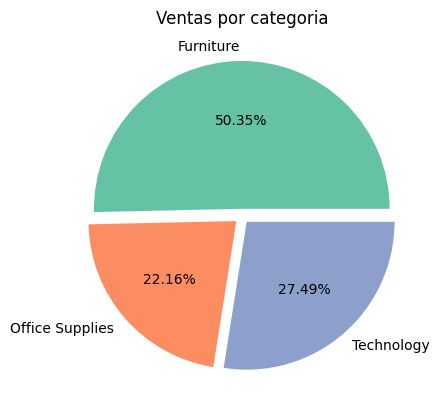

In [123]:
a = superstore.groupby("Category", observed=False)["Sales"].sum() #observed=False es por una adevertencia de version de pandas
# Crear el pie chart
a.plot.pie(
    autopct='%1.2f%%',
    explode=[0.05, 0.05, 0.05],
    colors=sns.color_palette('Set2')
)
plt.title("Ventas por categoria")
plt.ylabel('')  # Eliminar la etiqueta del eje y
# Add space around each slice
    

plt.show()

*b. Grafique las ventas por región utilizando barras.*

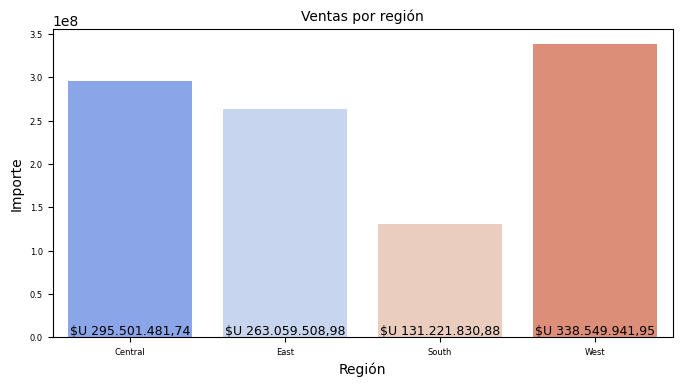

In [119]:
from babel.numbers import format_currency
def format(x):
    return format_currency(x, currency="$U", locale="es_UY")
    return "$ {:.1f} K".format(x/1000)

# Datos a graficar
mi_data = superstore[['Region','Sales']].groupby(by=['Region'], observed = False ).agg(
    {'Sales':'sum'}
).reset_index()
#.sort_values(by='Sales', ascending = False)
# use argsort method
rank = mi_data["Sales"].argsort()

plt.figure(figsize=(8,4))
grf = sns.barplot(data=mi_data,x=("Region"),y=("Sales"),hue="Region", errorbar=None, palette="coolwarm")

plt.title("Ventas por región",fontsize=10)
plt.xlabel("Región",fontsize=10)
plt.ylabel("Importe",fontsize=10)
plt.tick_params(labelsize=6)
for index, row in mi_data.iterrows():
    grf.text(row.name, index, format(round(row['Sales'], 2)),color='black',horizontalalignment='center',verticalalignment='center', va='bottom',fontsize=9)


c. *Grafique las ventas del año 2018 colocando la fecha en el eje x y las ventas en el eje y. Utilice un
gráfico de lineas.*


In [84]:
sales_2018 = superstore[superstore["Year_orderdate"]==2018] #creamos df donde el año de venta sea 2018

In [85]:
sales_2018 = sales_2018.groupby("Order Date")["Sales"].sum().reset_index()
# agrupamos ventas por dia

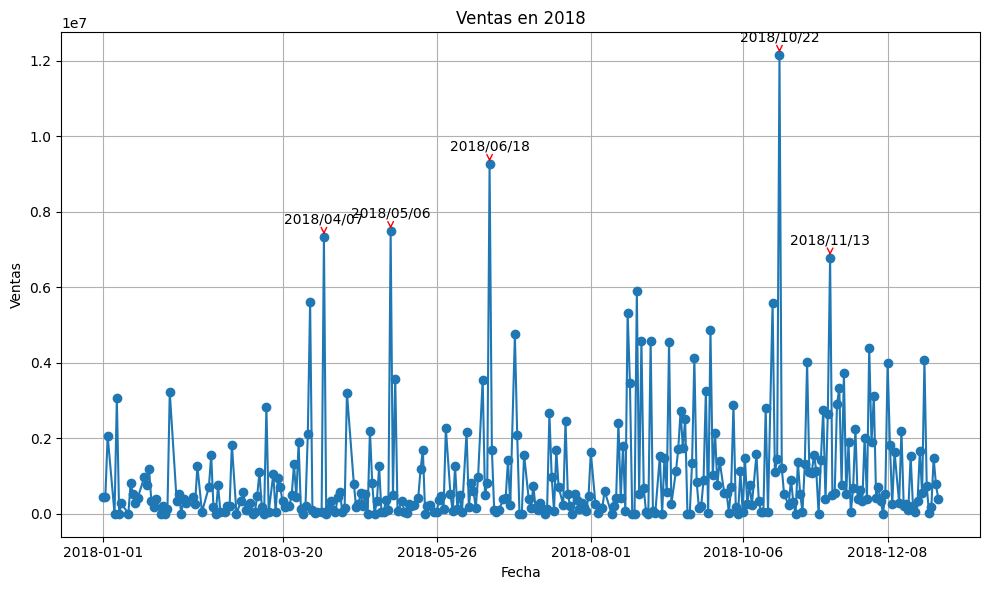

In [86]:
# Ordena el DF por la columna de fechas
sales_2018 = sales_2018.sort_values('Order Date')

# Grafica los datos
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
plt.plot(sales_2018['Order Date'], sales_2018['Sales'], marker='o')

# Personalización del gráfico
plt.title('Ventas en 2018')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)  # Agregar cuadrícula


# Mostrar solo una etiqueta por cada 60 días en el eje x y rotar las etiquetas del eje x para mayor claridad
plt.xticks(sales_2018['Order Date'][::60], rotation=0)

# Encontrar los cinco puntos más altos de y
top5_indices = sales_2018['Sales'].nlargest(5).index

# Marcar los valores de x en los cinco puntos más altos de y
for i in top5_indices:
    plt.annotate(f'{sales_2018["Order Date"].iloc[i].strftime("%Y/%m/%d")}',            # Con esto formateamos el valor de x, correspondiente a la fecha
                 (sales_2018['Order Date'].iloc[i], sales_2018['Sales'].iloc[i]),       # Le pasamos las cooordenadas del punto, segun los indices previamente obtenidos correspondiente
                 textcoords="offset points", xytext=(0,10), ha='center',                # Opciones de visualizacion
                 arrowprops=dict(arrowstyle="->", color='red'))                         # Definimos el estilo de la marca
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

**Parte 7**

*Se quiere realizar un descuento a un número reducido de clientes.
a. Utilizando el dataset costumer_discount muestre el siguiente detalle: el ID del cliente, su
nombre, categoría, el total de ventas, el descuento y las ventas con el descuento aplicado.*

*Obtencion y carga de los datos de los descuentos*

In [87]:
# discount = pd.read_csv(miPath+"/Customer_discount.csv")
# #discount = pd.read_csv("Customer_discount.csv")
# discount.head(2)

#url_discounts = 'https://raw.githubusercontent.com/bolso1899/TrabajoFinalCPE/main/Customer_discount.csv'
url_discounts = 'https://raw.githubusercontent.com/carlos1680/obligatorioCPE/main/ObligatorioFinal/Customer_discount.csv'
discount = pd.read_csv(url_discounts)
discount.sort_values(by='Customer ID')

,Customer ID,Customer Name,Discount
3,AS-10135,Adrian Shami,0.10
5,AS-10285,Alejandro Savely,0.20
0,CG-12520,Claire Gute,0.10
11,CJ-12010,Caroline Jumper,0.10
10,CS-12490,Cindy Schnelling,0.15
1,GG-14650,Greg Guthrie,0.15
6,GZ-14470,Gary Zandusky,0.20
8,KH-16360,Katherine Hughes,0.12
2,LC-16885,Lena Creighton,0.20
7,PO-19195,Phillina Ober,0.15


In [88]:
# Creamos una lista para luego poder buscar usandola
discount_ids = list(discount["Customer ID"].unique())

In [89]:
superstore_clients_with_discount = superstore[superstore["Customer ID"].isin(discount_ids)]  # filtramos por los clientes que coinciden en la lista de clientes con descuento
superstore_clients_with_discount = superstore_clients_with_discount.groupby(["Customer ID","Category"], observed=False)["Sales"].sum() # hacemos un guopuby con dos indices, y ponemos la columna sales
superstore_clients_with_discount = pd.DataFrame(superstore_clients_with_discount) #pasamos la data a un df
superstore_clients_with_discount = superstore_clients_with_discount[superstore_clients_with_discount["Sales"] != 0] # sacamos los valores donde sales sean 0
superstore_clients_with_discount

Sales
Customer ID Category                   
AS-10135    Furniture              4.18
            Office Supplies       54.64
AS-10285    Furniture           2888.82
            Office Supplies   134206.96
            Technology        140300.00
CG-12520    Furniture         132369.90
            Office Supplies     5362.16
CJ-12010    Furniture        3402461.60
            Office Supplies   501724.32
            Technology         44191.90
CS-12490    Furniture        5622925.00
            Office Supplies   122053.83
            Technology        271948.00
GG-14650    Furniture         787944.90
            Office Supplies   456299.61
            Technology          8346.30
GZ-14470    Furniture         247064.57
            Office Supplies     1235.88
            Technology           529.98
KH-16360    Furniture         135011.57
            Office Supplies  1152313.35
            Technology            19.98
LC-16885    Furniture        1742463.60
            Office Supplies  3253308.84
            Technology       1488857.97
PO-19195    Furniture         344372.00
            Office Supplies   364634.00
            Technology           329.87
RA-19915    Furniture         506059.40
            Office Supplies   346915.30
            Technology       2137722.95
SH-19975    Furniture        4895133.68
            Office Supplies   194253.16
            Technology         64095.98

In [90]:
#discount.set_index("Customer ID", inplace=True)
discount.reset_index(inplace=True) #sacamos a Customer ID del indice y lo pasamos a una columna
discount.head()

,index,Customer ID,Customer Name,Discount
0,0,CG-12520,Claire Gute,0.10
1,1,GG-14650,Greg Guthrie,0.15
2,2,LC-16885,Lena Creighton,0.20
3,3,AS-10135,Adrian Shami,0.10
4,4,RA-19915,Russell Applegate,0.15


In [91]:
# concatenar df por el indice

superstore_clients_with_discount
superstore_clients_with_discount.reset_index(level=1, inplace=True) #sacamos el indice de categoria
superstore_clients_with_discount.reset_index(inplace=True) #sacamos a Customer ID del indice y lo pasamos a una columna

In [92]:
df_marged = pd.merge(discount, superstore_clients_with_discount, on="Customer ID", how='left') #aplicamos merge y juntamos los df(no importa si se repiten los valores en alguna columna)
# (se hacen marge por una columna en comun, en este caso Custumer ID)
df_marged

,index,Customer ID,Customer Name,Discount,Category,Sales
0,0,CG-12520,Claire Gute,0.10,Furniture,132369.90
1,0,CG-12520,Claire Gute,0.10,Office Supplies,5362.16
2,1,GG-14650,Greg Guthrie,0.15,Furniture,787944.90
3,1,GG-14650,Greg Guthrie,0.15,Office Supplies,456299.61
4,1,GG-14650,Greg Guthrie,0.15,Technology,8346.30
5,2,LC-16885,Lena Creighton,0.20,Furniture,1742463.60
6,2,LC-16885,Lena Creighton,0.20,Office Supplies,3253308.84
7,2,LC-16885,Lena Creighton,0.20,Technology,1488857.97
8,3,AS-10135,Adrian Shami,0.10,Furniture,4.18
9,3,AS-10135,Adrian Shami,0.10,Office Supplies,54.64


In [93]:
#agregar columna de descuentos aplicados
df_marged["Sales whit discount"] = df_marged["Sales"] - df_marged["Sales"]*df_marged["Discount"]

#cambiar notacion cientifica a normal
pd.set_option('display.float_format', '{:.2f}'.format)

#cambiar de orden las columnas (ID del cliente, sunombre, categoría, el total de ventas, el descuento y las ventas con el descuento aplicado)
new_order=["Customer ID","Customer Name", "Category", "Sales", "Discount", "Sales whit discount"]
final = df_marged[new_order]

final

,Customer ID,Customer Name,Category,Sales,Discount,Sales whit discount
0,CG-12520,Claire Gute,Furniture,132369.90,0.10,119132.91
1,CG-12520,Claire Gute,Office Supplies,5362.16,0.10,4825.94
2,GG-14650,Greg Guthrie,Furniture,787944.90,0.15,669753.17
3,GG-14650,Greg Guthrie,Office Supplies,456299.61,0.15,387854.67
4,GG-14650,Greg Guthrie,Technology,8346.30,0.15,7094.35
5,LC-16885,Lena Creighton,Furniture,1742463.60,0.20,1393970.88
6,LC-16885,Lena Creighton,Office Supplies,3253308.84,0.20,2602647.07
7,LC-16885,Lena Creighton,Technology,1488857.97,0.20,1191086.38
8,AS-10135,Adrian Shami,Furniture,4.18,0.10,3.76
9,AS-10135,Adrian Shami,Office Supplies,54.64,0.10,49.18


In [94]:
final.groupby(["Customer ID","Customer Name"])["Sales whit discount"].sum()

Customer ID  Customer Name    
AS-10135     Adrian Shami             52.94
AS-10285     Alejandro Savely     221916.62
CG-12520     Claire Gute          123958.85
CJ-12010     Caroline Jumper     3553540.04
CS-12490     Cindy Schnelling    5114387.81
GG-14650     Greg Guthrie        1064702.19
GZ-14470     Gary Zandusky        199064.34
KH-16360     Katherine Hughes    1132863.51
LC-16885     Lena Creighton      5187704.33
PO-19195     Phillina Ober        602935.49
RA-19915     Russell Applegate   2542093.00
SH-19975     Sally Hughsby       4122786.26
Name: Sales whit discount, dtype: float64